# Use Logits

## Objectives

* create a model that maps an input to classes
* use one-hot encoding
* use softmax
* visualise the errors using matplotlib

## Use a linear model to predict non-linear behaviour

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'0.10.0'

<img align="left" src="files/old.png"> **Same Code** used in 1.2 Using Bias: changing just the function mapping

Here the input maps to two classes 1 and 2

In [3]:
x = tf.constant([[0.],[1.],[2.],[3.],[20.]])
y = tf.constant([[0.],[0.],[1.],[1.],[1.]])

weight = tf.Variable([[0.]])
bias = tf.Variable([[0.]])

y_pred = tf.matmul(x, weight) + bias

loss = (y - y_pred)**2

train_step = tf.train.GradientDescentOptimizer(0.0005).minimize(loss)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

for i in range(0,200):
    sess.run(train_step)

## Predictions

In [4]:
sess.run(y_pred)

array([[ 0.20972852],
       [ 0.25705388],
       [ 0.30437925],
       [ 0.35170463],
       [ 1.15623593]], dtype=float32)

A terrible job!

2 out of 5 data points are misclassified

## Heatmap of errors

<img align="left" src="files/new.png"> **New Code:** It is easyer to look at the error as a heatmap, so let's create a function that plots the error.

In [7]:
def heatmap(data):
    data = map(abs, data)
    img = plt.imshow(data, interpolation='nearest')
    img.set_cmap('inferno')
    plt.clim(0,1)
    plt.axis('off')    
    plt.show() 

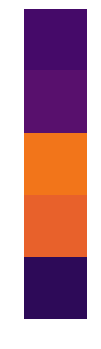

In [8]:
heatmap(sess.run(y_pred) - sess.run(y))

## One-hot encoding

Improve the classification error by using One-hot encoding

read: https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science

<img align="left" src="files/modified.png"> **Modified Code:**
* y is a (input_size,2) matrice, where 2 is the number of classes
* using tf.nn.softmax to calculate y_pred from logits.

In [9]:
x = tf.constant([[0.],[1.],[2.],[3.],[20.]])
y = tf.constant([[1.,0.],[1.,0.],[0.,1.],[0.,1.],[0.,1.]])

weight = tf.Variable([[0.,0.]])
bias = tf.Variable([[0.,0.]])

logits = tf.matmul(x, weight) + bias
y_pred = tf.nn.softmax(logits)


loss = (y - y_pred)**2

train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

for i in range(0,2000):
    sess.run(train_step) 

## Predictions

In [10]:
sess.run(y_pred)

array([[  9.99953747e-01,   4.62199896e-05],
       [  9.62486982e-01,   3.75130363e-02],
       [  2.95296125e-02,   9.70470369e-01],
       [  3.60846607e-05,   9.99963880e-01],
       [  0.00000000e+00,   1.00000000e+00]], dtype=float32)

## Error heatmap

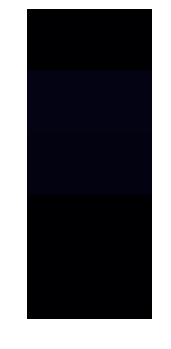

In [11]:
heatmap(sess.run(y_pred) - sess.run(y))